In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'C:\Users\ryan-rosa\Desktop\Ryan\Python\ProjetoEstagio\Banco_De_Dados_Slide6e7'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Boletim SE 06 2022.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [37]:
#dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
dados = pd.read_excel(f'{caminho}/Boletim SE 06 2022.xlsx')
dados.head(50)

,Município,Região,Município/Região,SE,Detectável,Total,% Detectáveis na Região,% Detectáveis no RS
0,SANTA MARIA,"R01, R02",SANTA MARIA - R01 R02,2021_48,57,1164,4.896907,8.026787
1,SANTA MARIA,"R01, R02",SANTA MARIA - R01 R02,2021_49,40,1030,3.883495,7.037710
2,SANTA MARIA,"R01, R02",SANTA MARIA - R01 R02,2021_50,39,977,3.991812,6.496500
3,SANTA MARIA,"R01, R02",SANTA MARIA - R01 R02,2021_51,38,834,4.556355,5.570011
4,SANTA MARIA,"R01, R02",SANTA MARIA - R01 R02,2021_52,114,1228,9.283388,8.978554
5,SANTA MARIA,"R01, R02",SANTA MARIA - R01 R02,2022_01,1018,5080,20.039370,18.537228
6,SANTA MARIA,"R01, R02",SANTA MARIA - R01 R02,2022_02,1414,10385,13.615792,19.973571
7,SANTA MARIA,"R01, R02",SANTA MARIA - R01 R02,2022_03,1920,11591,16.564576,23.351380
8,SANTA MARIA,"R01, R02",SANTA MARIA - R01 R02,2022_04,2206,10906,20.227398,24.049828
9,SANTA MARIA,"R01, R02",SANTA MARIA - R01 R02,2022_05,1971,9482,20.786754,25.315954


In [5]:
rs = dados.groupby('SE').sum()
rs['Detectaveis RS'] = rs['Detectável']/rs[r'Total']*100
rs = rs['Detectaveis RS']
rs

SE
2021_48     8.026787
2021_49     7.037710
2021_50     6.496500
2021_51     5.570011
2021_52     8.978554
2022_01    18.537228
2022_02    19.973571
2022_03    23.351380
2022_04    24.049828
2022_05    25.315954
2022_06    16.460601
Name: Detectaveis RS, dtype: float64

In [6]:
santaMaria = dados.loc[dados['Município/Região']=='SANTA MARIA - R01 R02']
santaMaria = santaMaria.groupby('SE').sum()
santaMaria = santaMaria['% Detectáveis na Região']

In [38]:
uruguaiana = dados.loc[dados['Município/Região']=='URUGUAIANA - R03']
uruguaiana = uruguaiana.groupby('SE').sum()
uruguaiana = uruguaiana['% Detectáveis na Região']
uruguaiana

SE
2021_48     6.746214
2021_49     4.828389
2021_50     6.085083
2021_51     7.876923
2021_52    11.090226
2022_01    24.120100
2022_02    28.782247
2022_03    25.934112
2022_04    22.874863
2022_05    22.527754
2022_06    17.887752
Name: % Detectáveis na Região, dtype: float64

In [8]:
capao = dados.loc[dados['Município/Região']=='CAPAO DA CANOA - R04 R05']
capao = capao.groupby('SE').sum()
capao = capao['% Detectáveis na Região']

In [9]:
taquara = dados.loc[dados['Município/Região']=='TAQUARA - R06']
taquara = taquara.groupby('SE').sum()
taquara = taquara['% Detectáveis na Região']

In [10]:
nh = dados.loc[dados['Município/Região']=='NOVO HAMBURGO - R07']
nh = nh.groupby('SE').sum()
nh = nh['% Detectáveis na Região']

In [11]:
canoas = dados.loc[dados['Município/Região']=='CANOAS - R08']
canoas = canoas.groupby('SE').sum()
canoas = canoas['% Detectáveis na Região']

In [12]:
guaiba = dados.loc[dados['Município/Região']=='GUAIBA - R09']
guaiba = guaiba.groupby('SE').sum()
guaiba = guaiba['% Detectáveis na Região']

In [13]:
poa = dados.loc[dados['Município/Região']=='PORTO ALEGRE - R10']
poa = poa.groupby('SE').sum()
poa = poa['% Detectáveis na Região']

In [14]:
santoAngelo = dados.loc[dados['Município/Região']=='SANTO ANGELO - R11']
santoAngelo = santoAngelo.groupby('SE').sum()
santoAngelo = santoAngelo['% Detectáveis na Região']

In [15]:
cruzAlta = dados.loc[dados['Município/Região']=='CRUZ ALTA - R12']
cruzAlta = cruzAlta.groupby('SE').sum()
cruzAlta = cruzAlta['% Detectáveis na Região']

In [16]:
ijui = dados.loc[dados['Município/Região']=='IJUI - R13']
ijui = ijui.groupby('SE').sum()
ijui = ijui['% Detectáveis na Região']

In [17]:
santaRosa = dados.loc[dados['Município/Região']=='SANTA ROSA - R14']
santaRosa = santaRosa.groupby('SE').sum()

In [18]:
semana = santaRosa.reset_index()
semana = semana['SE']

In [19]:
santaRosa = santaRosa['% Detectáveis na Região']

In [20]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 18_2_2022'

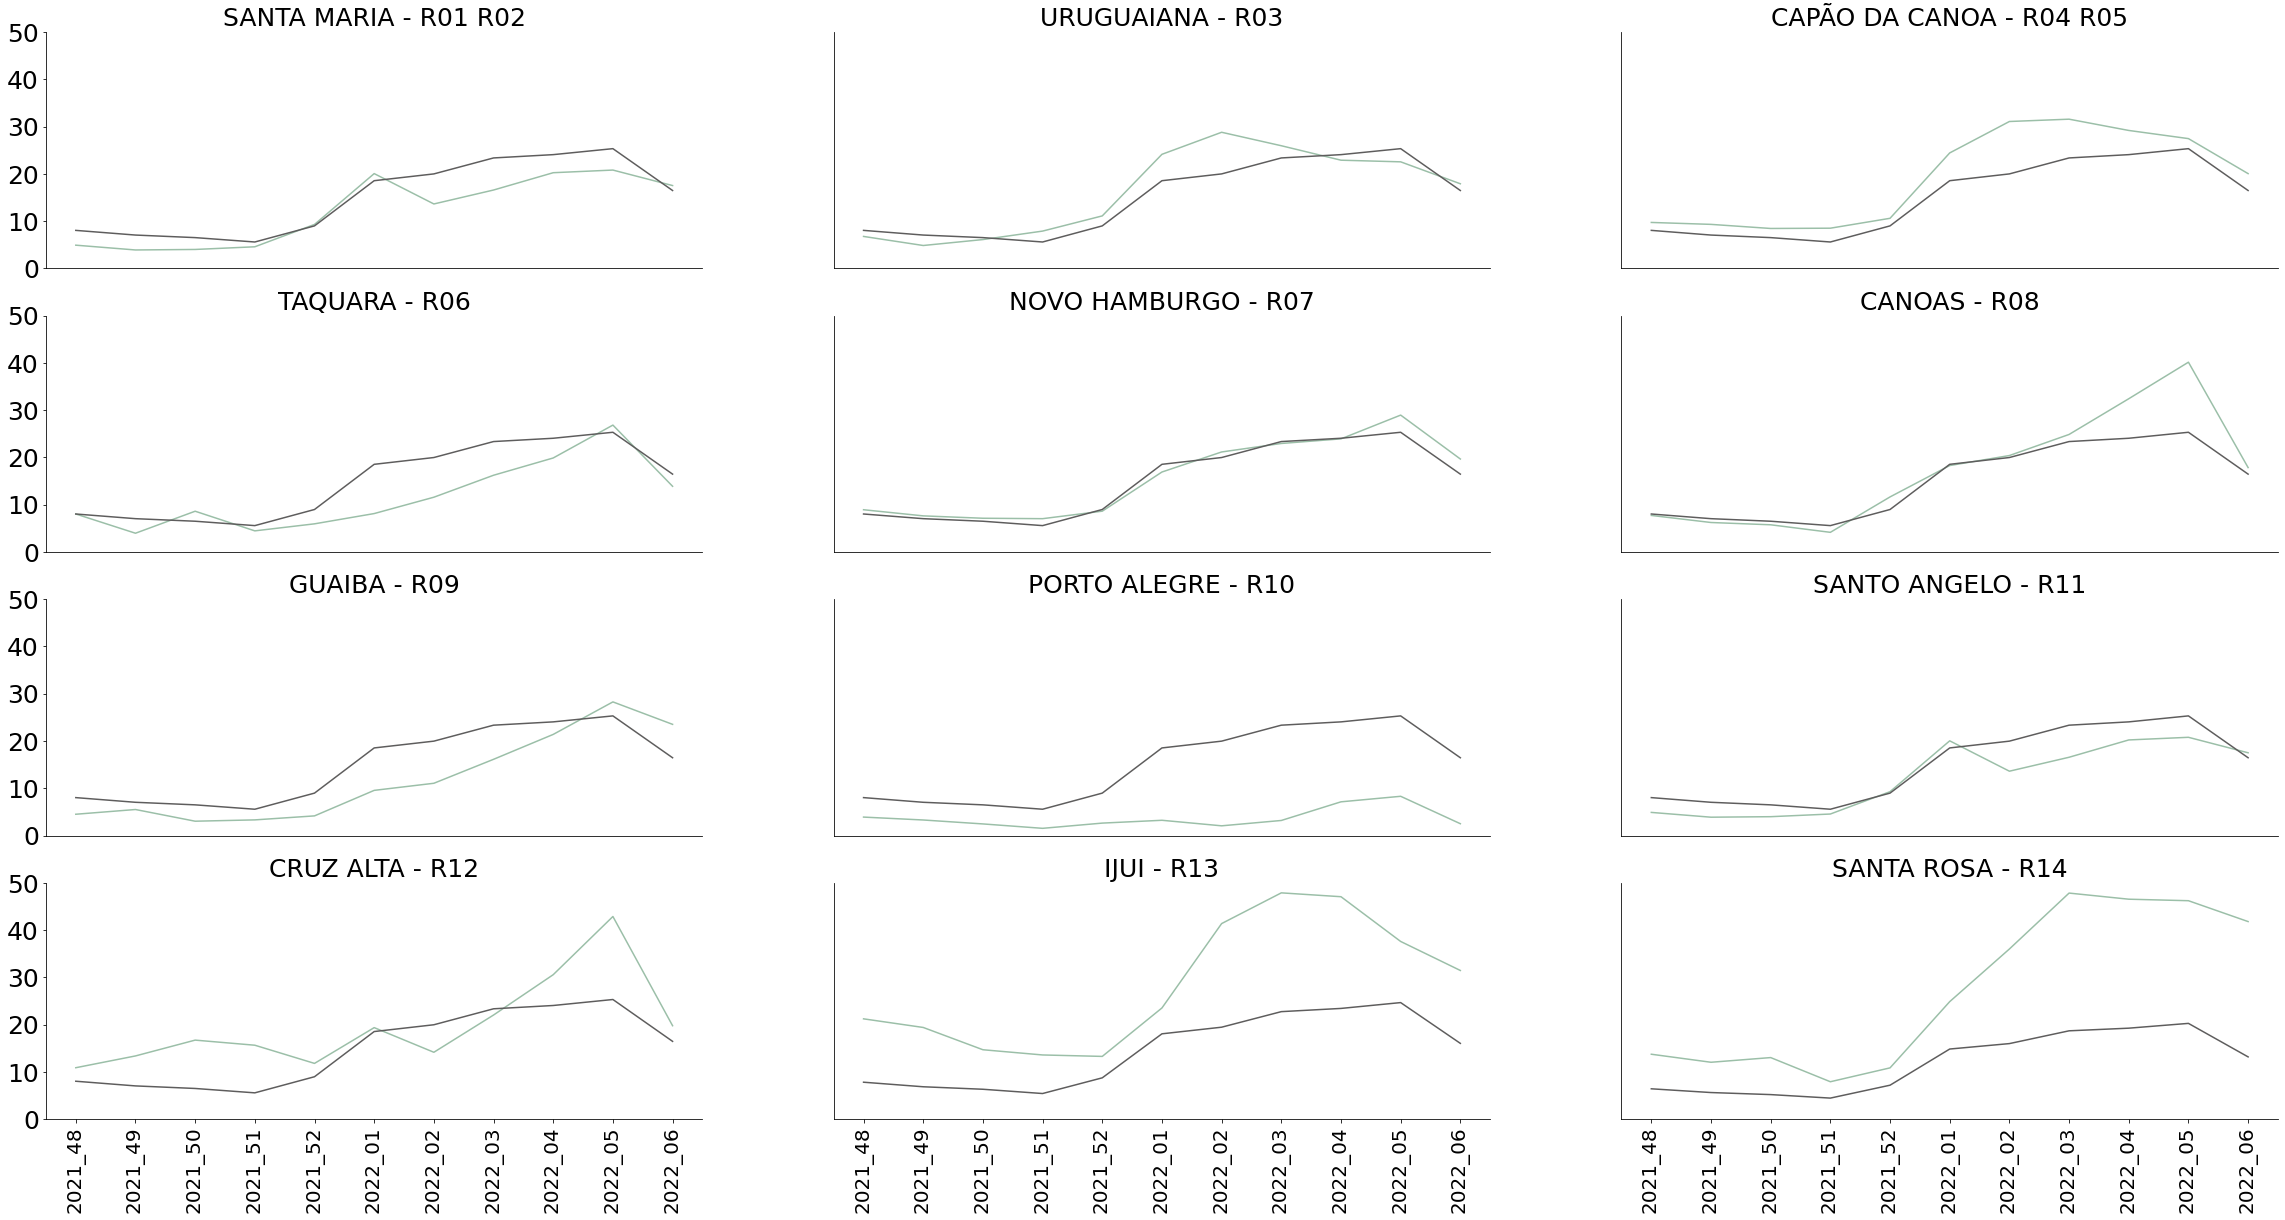

In [39]:
plt.figure(figsize=(40,20))

plt.subplot(4,3,1)
plt.title('SANTA MARIA - R01 R02',fontsize=25)
plt.plot(semana,santaMaria,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.yticks(np.arange(0,60,10),fontsize=25)
plt.gca().get_xaxis().set_visible(False)

plt.subplot(4,3,2)
plt.title('URUGUAIANA - R03',fontsize=25)
plt.plot(semana,uruguaiana,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(4,3,3)
plt.title('CAPÃO DA CANOA - R04 R05',fontsize=25)
plt.plot(semana,capao,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(4,3,4)
plt.title('TAQUARA - R06',fontsize=25)
plt.plot(semana,taquara,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.yticks(np.arange(0,60,10),fontsize=25)
plt.gca().get_xaxis().set_visible(False)

plt.subplot(4,3,5)
plt.title('NOVO HAMBURGO - R07',fontsize=25)
plt.plot(semana,nh,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(4,3,6)
plt.title('CANOAS - R08',fontsize=25)
plt.plot(semana,canoas,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(4,3,7)
plt.title('GUAIBA - R09',fontsize=25)
plt.plot(semana,guaiba,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.yticks(np.arange(0,60,10),fontsize=25)
plt.gca().get_xaxis().set_visible(False)

plt.subplot(4,3,8)
plt.title('PORTO ALEGRE - R10',fontsize=25)
plt.plot(semana,poa,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(4,3,9)
plt.title('SANTO ANGELO - R11',fontsize=25)
plt.plot(semana,santaMaria,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(4,3,10)
plt.title('CRUZ ALTA - R12',fontsize=25)
plt.plot(semana,cruzAlta,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.yticks(np.arange(0,60,10),fontsize=25)
plt.xticks(fontsize=20,rotation=90)

plt.subplot(4,3,11)
plt.title('IJUI - R13',fontsize=25)
plt.plot(semana,ijui,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.xticks(fontsize=20,rotation=90)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(4,3,12)
plt.title('SANTA ROSA - R14',fontsize=25)
plt.plot(semana,santaRosa,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.xticks(fontsize=20,rotation=90)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

sns.despine()
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide6.png',dpi=720,bbox_inches='tight')

In [22]:
palmeiras = dados.loc[dados['Município/Região']=='PALMEIRA DAS MISSOES - R15 R20']
palmeiras = palmeiras.groupby('SE').sum()
palmeiras = palmeiras['% Detectáveis na Região']
palmeiras

SE
2021_48    13.806706
2021_49    11.979823
2021_50    14.418605
2021_51    10.154525
2021_52    11.850866
2022_01    26.440827
2022_02    37.775489
2022_03    42.317126
2022_04    37.987381
2022_05    39.005964
2022_06    30.887457
Name: % Detectáveis na Região, dtype: float64

In [23]:
erechim = dados.loc[dados['Município/Região']=='ERECHIM - R16']
erechim = erechim.groupby('SE').sum()
erechim = erechim['% Detectáveis na Região']

In [24]:
passoFundo = dados.loc[dados['Município/Região']=='PASSO FUNDO - R17 R18 R19']
passoFundo = passoFundo.groupby('SE').sum()
passoFundo = passoFundo['% Detectáveis na Região']

In [25]:
pelotas = dados.loc[dados['Município/Região']=='PELOTAS - R21']
pelotas = pelotas.groupby('SE').sum()
pelotas = pelotas['% Detectáveis na Região']

In [26]:
bage = dados.loc[dados['Município/Região']=='BAGE - R22']
bage = bage.groupby('SE').sum()
bage = bage['% Detectáveis na Região']

In [27]:
caxias = dados.loc[dados['Município/Região']=='CAXIAS DO SUL - R23 R24 R25 R26']
caxias = caxias.groupby('SE').sum()
caxias = caxias['% Detectáveis na Região']

In [28]:
cachoeira = dados.loc[dados['Município/Região']=='CACHOEIRA DO SUL - R27']
cachoeira = cachoeira.groupby('SE').sum()
cachoeira = cachoeira['% Detectáveis na Região']

In [29]:
santaCruz = dados.loc[dados['Município/Região']=='SANTA CRUZ DO SUL - R28']
santaCruz = santaCruz.groupby('SE').sum()
santaCruz = santaCruz['% Detectáveis na Região']

In [30]:
lajeado = dados.loc[dados['Município/Região']=='LAJEADO - R29 R30']
lajeado = lajeado.groupby('SE').sum()
lajeado = lajeado['% Detectáveis na Região']

In [31]:
legenda = pd.DataFrame(columns=['% Detectáveis na Região','% Detectáveis no RS'])

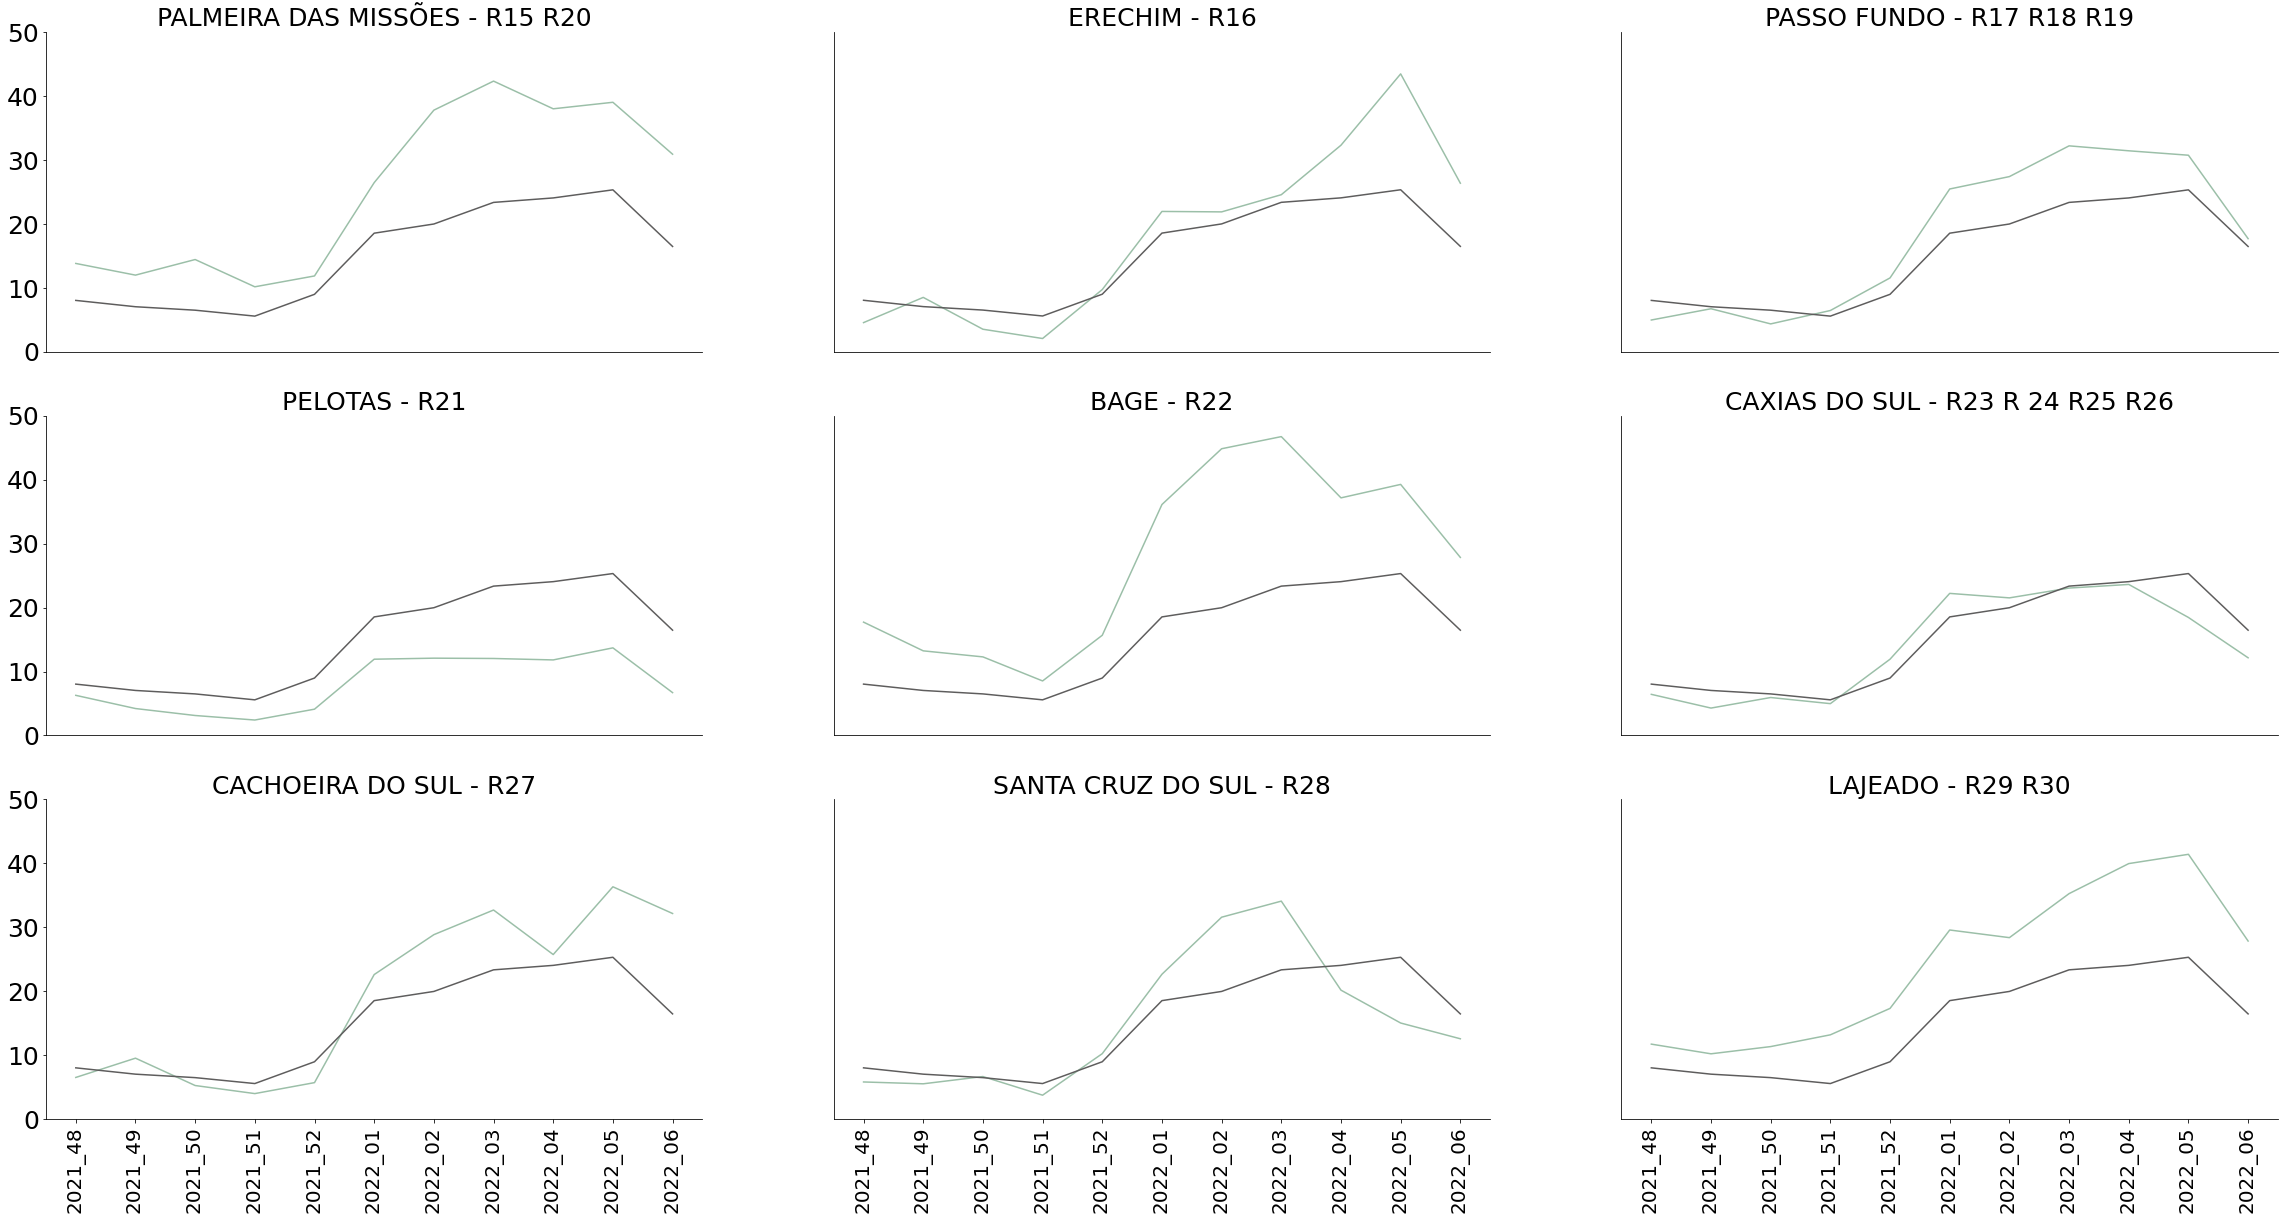

In [32]:
plt.figure(figsize=(40,20))

plt.subplot(3,3,1)
plt.title('PALMEIRA DAS MISSÕES - R15 R20',fontsize=25)
plt.plot(semana,palmeiras,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.yticks(np.arange(0,60,10),fontsize=25)
plt.gca().get_xaxis().set_visible(False)

plt.subplot(3,3,2)
plt.title('ERECHIM - R16',fontsize=25)
plt.plot(semana,erechim,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(3,3,3)
plt.title('PASSO FUNDO - R17 R18 R19',fontsize=25)
plt.plot(semana,passoFundo,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(3,3,4)
plt.title('PELOTAS - R21',fontsize=25)
plt.plot(semana,pelotas,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.yticks(np.arange(0,60,10),fontsize=25)
plt.gca().get_xaxis().set_visible(False)

plt.subplot(3,3,5)
plt.title('BAGE - R22',fontsize=25)
plt.plot(semana,bage,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(3,3,6)
plt.title('CAXIAS DO SUL - R23 R 24 R25 R26',fontsize=25)
plt.plot(semana,caxias,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(3,3,7)
plt.title('CACHOEIRA DO SUL - R27',fontsize=25)
plt.plot(semana,cachoeira,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.xticks(fontsize=20,rotation=90)
plt.yticks(np.arange(0,60,10),fontsize=25)

plt.subplot(3,3,8)
plt.title('SANTA CRUZ DO SUL - R28',fontsize=25)
plt.plot(semana,santaCruz,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.xticks(fontsize=20,rotation=90)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

plt.subplot(3,3,9)
plt.title('LAJEADO - R29 R30',fontsize=25)
plt.plot(semana,lajeado,color='#9bbfa8')
plt.plot(semana,rs,color='#5e5d5d')
plt.xticks(fontsize=20,rotation=90)
plt.gca().get_yaxis().set_visible(False)
plt.yticks(np.arange(0,60,10))

sns.despine()
#plt.legend(legenda,fontsize=40,shadow=True,ncol=2)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide7',dpi=720,bbox_inches='tight')